In [ ]:
import sys, os

project_root = os.path.abspath(os.path.join(os.getcwd(), ".."))
sys.path.insert(0, project_root)

print("Project root added to PYTHONPATH:", project_root)

Project root added to PYTHONPATH: /home/jasnoorpannu/CSE/Projects/dropout-predictor


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from src.config import RAW_DATA, MODEL_PATH

In [3]:
pd.set_option("display.max_columns", None)
df = pd.read_csv(RAW_DATA)
df.head()

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,date_registration,date_unregistration,id_site,date,sum_click
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass,-159.0,NaN,546669.0,-5.0,16.0
1,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass,-159.0,NaN,546662.0,-5.0,44.0
2,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass,-159.0,NaN,546652.0,-5.0,1.0
3,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass,-159.0,NaN,546668.0,-5.0,2.0
4,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass,-159.0,NaN,546652.0,-5.0,1.0


In [4]:
print("Shape:", df.shape)
print("\nColumn Types:")
print(df.dtypes)

print("\nMissing Values:")
print(df.isna().sum())

Shape: (10658645, 17)

Column Types:
code_module              object
code_presentation        object
id_student                int64
gender                   object
region                   object
highest_education        object
imd_band                 object
age_band                 object
num_of_prev_attempts      int64
studied_credits           int64
disability               object
final_result             object
date_registration       float64
date_unregistration     float64
id_site                 float64
date                    float64
sum_click               float64
dtype: object

Missing Values:
code_module                   0
code_presentation             0
id_student                    0
gender                        0
region                        0
highest_education             0
imd_band                 601942
age_band                      0
num_of_prev_attempts          0
studied_credits               0
disability                    0
final_result                  0
date

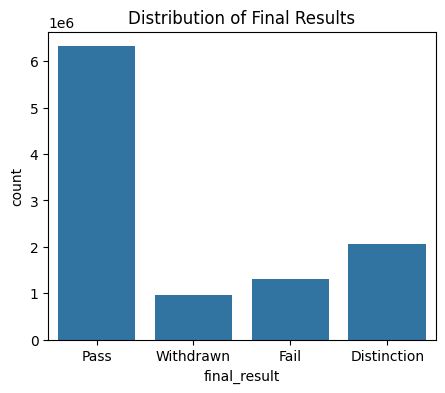

final_result
Pass           59.318563
Distinction    19.374217
Fail           12.310533
Withdrawn       8.996688
Name: proportion, dtype: float64

In [5]:
plt.figure(figsize=(5,4))
sns.countplot(data=df, x="final_result")
plt.title("Distribution of Final Results")
plt.show()

df["final_result"].value_counts(normalize=True) * 100

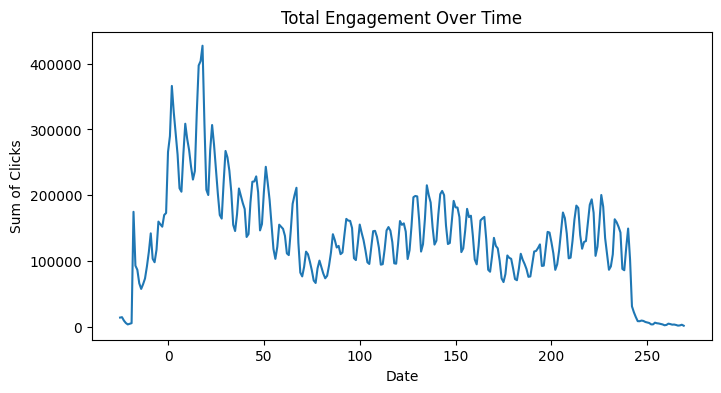

In [6]:
daily_engagement = df.groupby("date")["sum_click"].sum()

plt.figure(figsize=(8,4))
daily_engagement.plot()
plt.title("Total Engagement Over Time")
plt.xlabel("Date")
plt.ylabel("Sum of Clicks")
plt.show()

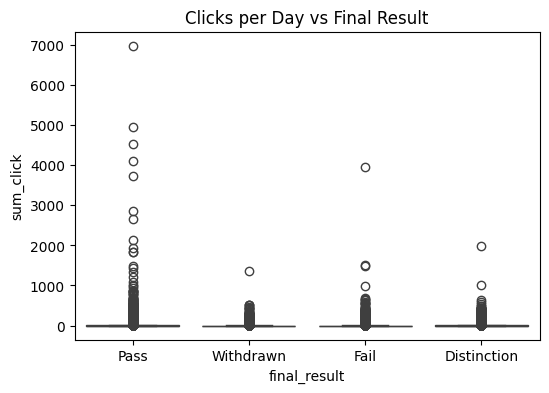

In [7]:
plt.figure(figsize=(6,4))
sns.boxplot(data=df, x="final_result", y="sum_click")
plt.title("Clicks per Day vs Final Result")
plt.show()

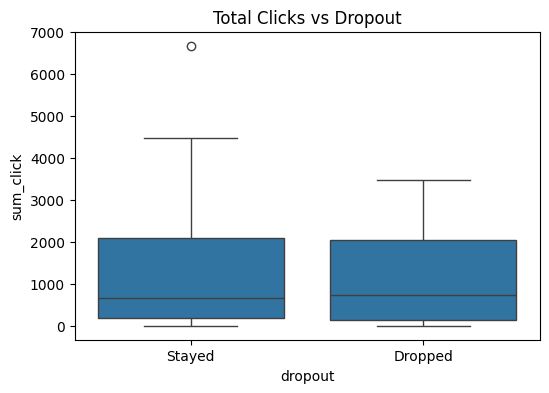

In [8]:
student_stats = df.groupby("id_student")["sum_click"].sum().reset_index()
student_stats["dropout"] = (df.groupby("id_student")["final_result"].first() == "Withdrawn").astype(int)

plt.figure(figsize=(6,4))
sns.boxplot(data=student_stats, x="dropout", y="sum_click")
plt.title("Total Clicks vs Dropout")
plt.xticks([0,1], ["Stayed", "Dropped"])
plt.show()

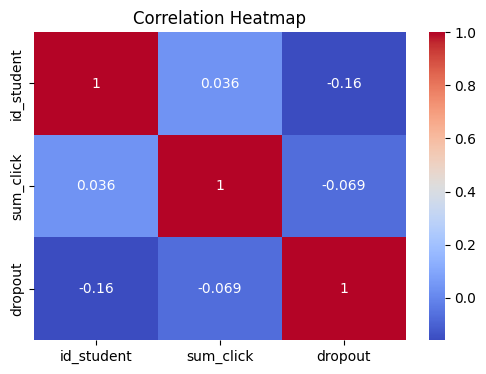

In [9]:
df_corr = student_stats.copy()
plt.figure(figsize=(6,4))
sns.heatmap(df_corr.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

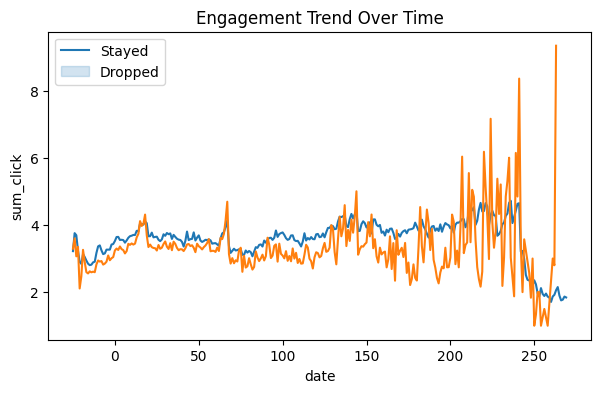

In [11]:
df2 = df.copy()
df2["dropout"] = (df2["final_result"] == "Withdrawn").astype(int)

trend = df2.groupby(["date", "dropout"])["sum_click"].mean().reset_index()

plt.figure(figsize=(7,4))
sns.lineplot(data=trend, x="date", y="sum_click", hue="dropout")
plt.title("Engagement Trend Over Time")
plt.legend(labels=["Stayed", "Dropped"])
plt.show()

In [12]:
student_stats.describe()

,id_student,sum_click,dropout
count,2.878500e+04,28785.00000,42.000000
mean,7.074447e+05,1375.89366,0.333333
std,5.504403e+05,1895.23151,0.477119
min,3.733000e+03,0.00000,0.000000
25%,5.081030e+05,180.00000,0.000000
50%,5.906260e+05,686.00000,0.000000
75%,6.464820e+05,1816.00000,1.000000
max,2.716795e+06,28615.00000,1.000000
